In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

RSEED=50

In [4]:
df = pd.read_csv('2015.csv').sample(100000, random_state=RSEED)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
383119,49.0,4.0,b'05192015',b'05',b'19',b'2015',1100.0,2.015009e+09,2.015009e+09,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
55536,9.0,9.0,b'09232015',b'09',b'23',b'2015',1100.0,2.015005e+09,2.015005e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
267093,34.0,10.0,b'11052015',b'11',b'05',b'2015',1100.0,2.015011e+09,2.015011e+09,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
319092,41.0,4.0,b'04062015',b'04',b'06',b'2015',1100.0,2.015002e+09,2.015002e+09,1.0,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0
420978,54.0,5.0,b'05112015',b'05',b'11',b'2015',1100.0,2.015004e+09,2.015004e+09,NaN,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0


In [5]:
df = df.select_dtypes('number')

In [7]:
df['_RFHLTH']

383119    1.0
55536     1.0
267093    1.0
319092    1.0
420978    1.0
         ... 
223705    1.0
193441    1.0
39766     1.0
142057    1.0
386390    1.0
Name: _RFHLTH, Length: 100000, dtype: float64

In [8]:
df['_RFHLTH'].value_counts()

1.0    81140
2.0    18579
9.0      281
Name: _RFHLTH, dtype: int64

In [11]:
df['_RFHLTH'] = df['_RFHLTH'].replace({2: 0, 9: 0})
df['_RFHLTH'].value_counts()

1.0    81140
0.0    18860
Name: _RFHLTH, dtype: int64

In [12]:
df = df.loc[df['_RFHLTH'].isin([0, 1])].copy()
df.head()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
383119,49.0,4.0,1100.0,2.015009e+09,2.015009e+09,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
55536,9.0,9.0,1100.0,2.015005e+09,2.015005e+09,1.0,1.0,NaN,1.0,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
267093,34.0,10.0,1100.0,2.015011e+09,2.015011e+09,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
319092,41.0,4.0,1100.0,2.015002e+09,2.015002e+09,1.0,1.0,NaN,1.0,1.0,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0
420978,54.0,5.0,1100.0,2.015004e+09,2.015004e+09,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0


In [14]:
print(df['_RFHLTH'].isin([0, 1]))
df['_RFHLTH']

383119    True
55536     True
267093    True
319092    True
420978    True
          ... 
223705    True
193441    True
39766     True
142057    True
386390    True
Name: _RFHLTH, Length: 100000, dtype: bool


383119    1.0
55536     1.0
267093    1.0
319092    1.0
420978    1.0
         ... 
223705    1.0
193441    1.0
39766     1.0
142057    1.0
386390    1.0
Name: _RFHLTH, Length: 100000, dtype: float64

In [15]:
df = df.rename(columns={'_RFHLTH': 'label'})
df['label'].value_counts()

1.0    81140
0.0    18860
Name: label, dtype: int64

In [16]:
# Remove columns with missing values
df = df.drop(columns = ['POORHLTH', 'PHYSHLTH', 'GENHLTH', 'PAINACT2', 
                        'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'HLTHPLN1', 'MENTHLTH'])

In [17]:
df.head()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
383119,49.0,4.0,1100.0,2.015009e+09,2.015009e+09,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
55536,9.0,9.0,1100.0,2.015005e+09,2.015005e+09,1.0,1.0,NaN,1.0,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
267093,34.0,10.0,1100.0,2.015011e+09,2.015011e+09,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
319092,41.0,4.0,1100.0,2.015002e+09,2.015002e+09,1.0,1.0,NaN,1.0,1.0,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0
420978,54.0,5.0,1100.0,2.015004e+09,2.015004e+09,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0


In [18]:
from sklearn.model_selection import train_test_split

#Extracting The Labels
labels = np.array(df.pop('label'))

# Putting 30% Of all the Sample into The Test Data
train, test, train_labels, test_labels = train_test_split(df, labels, stratify=labels, test_size= 0.3, random_state = RSEED)

In [19]:
train

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
191495,26.0,4.0,1200.0,2.015008e+09,2.015008e+09,NaN,NaN,NaN,NaN,NaN,...,9.0,9.0,3.0,3.0,4.0,9.0,9.0,NaN,NaN,NaN
373551,48.0,10.0,1200.0,2.015014e+09,2.015014e+09,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,NaN
356834,47.0,11.0,1100.0,2.015003e+09,2.015003e+09,1.0,1.0,NaN,1.0,2.0,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
292263,37.0,9.0,1100.0,2.015006e+09,2.015006e+09,NaN,NaN,NaN,NaN,NaN,...,9.0,9.0,3.0,3.0,4.0,1.0,1.0,1.0,1.0,2.0
132699,20.0,12.0,1200.0,2.015017e+09,2.015017e+09,NaN,NaN,NaN,NaN,NaN,...,9.0,9.0,3.0,3.0,4.0,9.0,9.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251400,33.0,5.0,1100.0,2.015002e+09,2.015002e+09,1.0,1.0,NaN,1.0,1.0,...,4.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,1.0,2.0
422207,54.0,11.0,1100.0,2.015005e+09,2.015005e+09,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
177435,25.0,2.0,1100.0,2.015003e+09,2.015003e+09,1.0,1.0,NaN,1.0,1.0,...,3.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
56609,9.0,10.0,1100.0,2.015006e+09,2.015006e+09,1.0,1.0,NaN,1.0,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,9.0


In [20]:
train = train.fillna(train.mean())
train

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
191495,26.0,4.0,1200.0,2.015008e+09,2.015008e+09,1.0,1.000149,1.0,1.0,1.541651,...,9.0,9.0,3.0,3.0,4.0,9.0,9.0,2.325164,2.44224,1.972238
373551,48.0,10.0,1200.0,2.015014e+09,2.015014e+09,1.0,1.000149,1.0,1.0,1.541651,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,2.325164,2.44224,1.972238
356834,47.0,11.0,1100.0,2.015003e+09,2.015003e+09,1.0,1.000000,1.0,1.0,2.000000,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,2.325164,2.44224,1.000000
292263,37.0,9.0,1100.0,2.015006e+09,2.015006e+09,1.0,1.000149,1.0,1.0,1.541651,...,9.0,9.0,3.0,3.0,4.0,1.0,1.0,1.000000,1.00000,2.000000
132699,20.0,12.0,1200.0,2.015017e+09,2.015017e+09,1.0,1.000149,1.0,1.0,1.541651,...,9.0,9.0,3.0,3.0,4.0,9.0,9.0,2.325164,2.44224,1.972238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251400,33.0,5.0,1100.0,2.015002e+09,2.015002e+09,1.0,1.000000,1.0,1.0,1.000000,...,4.0,2.0,3.0,3.0,4.0,2.0,2.0,2.000000,1.00000,2.000000
422207,54.0,11.0,1100.0,2.015005e+09,2.015005e+09,1.0,1.000149,1.0,1.0,1.541651,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,2.325164,2.44224,1.000000
177435,25.0,2.0,1100.0,2.015003e+09,2.015003e+09,1.0,1.000000,1.0,1.0,1.000000,...,3.0,2.0,3.0,3.0,4.0,1.0,1.0,2.325164,2.44224,2.000000
56609,9.0,10.0,1100.0,2.015006e+09,2.015006e+09,1.0,1.000000,1.0,1.0,1.000000,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,2.325164,2.44224,9.000000


In [21]:
test = test.fillna(test.mean())
test

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
201484,27.0,1.0,1100.0,2.015009e+09,2.015009e+09,1.0,1.000116,1.0,1.0,1.543218,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,2.297934,2.392073,1.000000
56008,9.0,10.0,1100.0,2.015005e+09,2.015005e+09,1.0,1.000000,1.0,1.0,1.000000,...,4.0,2.0,2.0,2.0,3.0,1.0,1.0,2.297934,2.392073,2.000000
399923,51.0,10.0,1100.0,2.015008e+09,2.015008e+09,1.0,1.000116,1.0,1.0,1.543218,...,9.0,9.0,3.0,3.0,4.0,1.0,1.0,2.297934,2.392073,2.000000
143526,21.0,11.0,1100.0,2.015004e+09,2.015004e+09,1.0,1.000000,1.0,1.0,1.000000,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,2.297934,2.392073,1.000000
214004,28.0,7.0,1100.0,2.015005e+09,2.015005e+09,1.0,1.000116,1.0,1.0,1.543218,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,2.297934,2.392073,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271558,35.0,11.0,1100.0,2.015004e+09,2.015004e+09,1.0,1.000000,1.0,1.0,2.000000,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,2.297934,2.392073,1.000000
100457,17.0,8.0,1100.0,2.015002e+09,2.015002e+09,1.0,1.000000,1.0,1.0,2.000000,...,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.000000,2.000000,2.000000
321667,41.0,4.0,1100.0,2.015004e+09,2.015004e+09,1.0,1.000116,1.0,1.0,1.543218,...,3.0,2.0,3.0,3.0,4.0,1.0,1.0,2.297934,2.392073,2.000000
392513,51.0,3.0,1100.0,2.015001e+09,2.015001e+09,1.0,1.000000,1.0,1.0,1.000000,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,1.000000,1.000000,9.000000


In [23]:
features = list(train.columns)
features

['_STATE',
 'FMONTH',
 'DISPCODE',
 'SEQNO',
 '_PSU',
 'CTELENUM',
 'PVTRESD1',
 'COLGHOUS',
 'STATERES',
 'CELLFON3',
 'LADULT',
 'NUMADULT',
 'NUMMEN',
 'NUMWOMEN',
 'CTELNUM1',
 'CELLFON2',
 'CADULT',
 'PVTRESD2',
 'CCLGHOUS',
 'CSTATE',
 'LANDLINE',
 'HHADULT',
 'PERSDOC2',
 'MEDCOST',
 'CHECKUP1',
 'BPHIGH4',
 'BPMEDS',
 'BLOODCHO',
 'CHOLCHK',
 'TOLDHI2',
 'CVDINFR4',
 'CVDCRHD4',
 'CVDSTRK3',
 'ASTHMA3',
 'ASTHNOW',
 'CHCSCNCR',
 'CHCOCNCR',
 'CHCCOPD1',
 'HAVARTH3',
 'ADDEPEV2',
 'CHCKIDNY',
 'DIABETE3',
 'DIABAGE2',
 'SEX',
 'MARITAL',
 'EDUCA',
 'RENTHOM1',
 'NUMHHOL2',
 'NUMPHON2',
 'CPDEMO1',
 'VETERAN3',
 'EMPLOY1',
 'CHILDREN',
 'INCOME2',
 'INTERNET',
 'WEIGHT2',
 'HEIGHT3',
 'PREGNANT',
 'QLACTLM2',
 'USEEQUIP',
 'BLIND',
 'DECIDE',
 'DIFFWALK',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'SMOKDAY2',
 'STOPSMK2',
 'LASTSMK2',
 'USENOW3',
 'ALCDAY5',
 'AVEDRNK2',
 'DRNK3GE5',
 'MAXDRNKS',
 'FRUITJU1',
 'FRUIT1',
 'FVBEANS',
 'FVGREEN',
 'FVORANG',
 'VEGETAB1',
 'EXERANY2',
 

In [24]:
train.shape

(70000, 313)

In [25]:
test.shape

(30000, 313)

In [26]:
train_labels

array([1., 0., 1., ..., 1., 1., 1.])

In [27]:
test_labels

array([1., 1., 1., ..., 1., 0., 0.])

In [34]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()

In [35]:
# Train tree
tree.fit(train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 12725 nodes with maximum depth 54.


In [37]:
# Make probability predictions
train_probs = tree.predict_proba(train)[:, 1]
probs = tree.predict_proba(test)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)

In [38]:
train_probs

array([1., 0., 1., ..., 1., 1., 1.])

In [39]:
probs

array([1., 1., 1., ..., 1., 1., 0.])

In [41]:
train_predictions

array([1., 0., 1., ..., 1., 1., 1.])

In [42]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.667540678069918


In [43]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [44]:
from collections import Counter
print(Counter(probs))
print(Counter(predictions))

Counter({1.0: 23989, 0.0: 6011})
Counter({1.0: 23989, 0.0: 6011})


Recall Baseline: 1.0 Test: 0.86 Train: 1.0
Precision Baseline: 0.81 Test: 0.88 Train: 1.0
Roc Baseline: 0.5 Test: 0.67 Train: 1.0


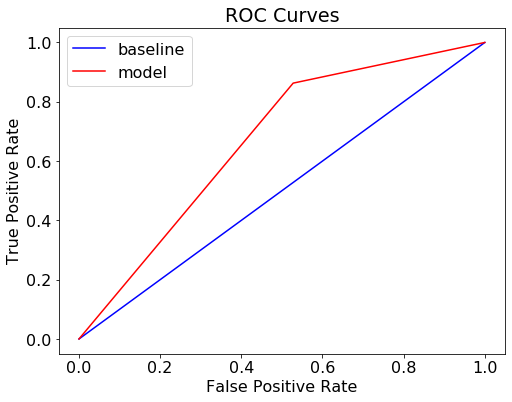

In [45]:
evaluate_model(predictions, probs, train_predictions, train_probs)